<a href="https://colab.research.google.com/github/MikeBear8/MikeBear8/blob/main/Current_transformer_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Как работать с программой


1. Копировать данный блокнот себе на диск. Для этого нужно завести аккаунт в гугле.
2.   Запустить все ячейки в разделе "Подготовка к работе" (комбинация ctrl+enter). В текущей сессии их запускать больше не требуется.
3.   Выбрать режим работы. Если необходимо сделать много расчётов из таблицы Excel, то выбираем режим №1 или №2. Режим №1 считает время до насыщения с учётом дискретности Tp и cosa ГОСТ Р 58669-2019. Режим №2 считает по фактическим значениям.
Если необходимо быстро сделать расчёт или прикинуть время до насыщения, то выбираем режим №3.
4. Если выбрали режим №3. Открываем раздел №3 --> Вводим исходные данные Tp, cosa, A_bez, Kr --> запускаем все ячейки и смотрим ответ --> по желанию можно скачать график кривой Кпр(t) (слева иконка "Files", нажимаем на неё, находим файл "кривая Кпр.png", жмём правую кнопку мыши и качаем)
5. Если выбрали режим №1 или №2.
Скачиваем шаблон таблицы с расчётом по ссылке https://docs.google.com/spreadsheets/d/1wSDNQyE6OCTzhlBijPRmVruZZcMLJuzr/edit?usp=sharing&ouid=115682010685827702142&rtpof=true&sd=true.
Посокльку программа вытаскивает необходимые для графического расчёта данные (постоянную времени, косинус вторичной ветви, параметр режима А и коэффициент остаточной намагниченности) с помощью наименования колонок, то изменять названия этих колонок нельзя. Формулы в ячейки можно забивать любые какие хочется. Заполняем таблицу, количество строк неограничено. Таблицу обязательно назвать "таблица", иначе программа её не увидит. После перетаскиваем файл с таблицей в пространство Files и запускаем все пункты либо из раздела №1, либо из раздела №2.
После расчётов автоматически скачается Excel файл с временами до насыщения. Копируем их в нашу таблицу, меняем автозаменой "." на "," и настраиваем стили. Готово!

По всем вопросам можно писать на почту:vtitovnstu@gmail.com

# Подготовка к работе

Подключение библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
from google.colab import files
!pip install xlrd --upgrade

Определение функций

In [ ]:
#функция, которая строит универсальную кривую
def uni_Kpr(t,Kpr):
  Kpr_uni=[]
  for i in range(len(t)):
    Kpr_max=0
    for j in range(len(Kpr)):
      if Kpr[j,i]>Kpr_max:
        Kpr_max=Kpr[j,i]
    Kpr_uni.append(Kpr_max)
  return np.array(Kpr_uni)

#функция, которая ищет точку пересечения параметра режима А с Кпр(t).
def peresechenie_A(Kpr, A):
  if max(Kpr)>=A:
    for i in range(1,len(Kpr)-1):
      if Kpr[i-1]<=A<=Kpr[i+1]:
        indx=i
        break
  else:
    indx='времени до насыщения не существует'
  return indx


#функция, которая запускает расчёт времени до насыщения.
#если времени до насыщения не существует, то время до насыщения на выходе будет 3000000 мс
def vremya_do_nasish(t,Kpr,A_bez,A_ost):
  Kpr_uni=uni_Kpr(t, Kpr)

  indx_bez=peresechenie_A(Kpr_uni, A_bez)
  if indx_bez=='времени до насыщения не существует':
    t_bez=3000
  else:
    t_bez=t[indx_bez]

  indx_ost=peresechenie_A(Kpr_uni, A_ost)
  if indx_ost=='времени до насыщения не существует':
    t_ost=3000
  else:
    t_ost=t[indx_ost]

  return Kpr_uni,t_bez,t_ost

#функция, которая ищет индекса числа "value" в массиве "array"
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# функция, которая печатает ответ
def otvet(t_bez, t_ost):
  if t_bez>=2000:
    print('При отсутствии остаточной намагниченности ТТ не насыщается')
  else:
    print('Время до насыщения без остаточной намагниченности равно',round(t_bez*1000,2),'мс')
  if t_ost>=2000:
    print('При наличии остаточной намагниченности ТТ не насыщается')
  else:
    print('Время до насыщения с остаточной намагниченностю равно',round(t_ost*1000,2),'мс')

#функция, которая строит график
def graphic(t,Kpr_uni,t_bez,t_ost, A_bez, A_ost):
  fig, ax = plt.subplots(figsize=(16,8))
  ax.plot(t, Kpr_uni)
  ax.plot(t, [A_bez for i in t],label='Парамтер A')
  ax.plot(t, [A_ost for i in t],label='Парамтер A(1-$K_r$)')

  ax.legend(loc='upper right')
  plt.xlabel('Время, с', fontsize=15, fontstyle='italic' )
  plt.ylabel(r'$K_{п.р.}(t)$', fontsize=15, fontstyle='italic')
  ax.minorticks_on()
  plt.grid(which='major',color = 'gray')
  ax.grid(which='minor',color = 'gray',linestyle = ':')
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.001))
  ax.set_xlim([0,t[-1]+0.0001])
  ax.set_ylim([0,max(Kpr_uni)+1])
  plt.savefig('кривая Кпр.png')
  plt.show()

# функция, которая делает красиво
def mnogo_Kpr(t,Kpr):
  fig, ax = plt.subplots(figsize=(16,8))
  for i in range(len(Kpr)):
    ax.plot(t*1000,Kpr[i])
  plt.xlabel('Время, мс', fontsize=25, fontstyle='italic' )
  plt.ylabel(r'$K_{п.р.}(t)$', fontsize=25, fontstyle='italic')
  ax.minorticks_on()
  plt.grid(which='major',color = 'gray')
  ax.grid(which='minor',color = 'gray',linestyle = ':')
  ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
  ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
  ax.set_xlim([0,t[-1]*1000+0.01])
  ax.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
                which = 'major',    #  Применяем параметры к основным делениям
                direction = 'inout', #  Рисуем деления внутри и снаружи графика
                labelsize = 15,    #  Размер подписи
               length = 10)    #  Длинна делений
               #width = 5)     #  Ширина делений
  plt.savefig('семейство.png')
  plt.show()

#1. Расчёт времени до насыщения графическим методом по ГОСТ Р 58669-2019 из таблицы Excel

Загрузка исходных данных из таблицы

In [ ]:
#задаём массивы времени, значений cosa и Tp из ГОСТа, угловую скорость
t=np.arange(0,0.05,0.00001)
w=2*np.pi*50
spisok_cosa=np.array([1,0.95,0.9,0.85,0.8])
spisok_Tp=np.array([0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3])

#загрузка таблицы
df=pd.read_excel('таблица.xls', header=0, index_col=0)
#загрузка и интерполяция Tp
Tp_input=df['Эквивалентная постоянная времени, \nТр.экв. (с)'].values
Tp_values=np.array([spisok_Tp[find_nearest(spisok_Tp,i)] for i in Tp_input])
#загрузка и интерполяция cosa
cosa_input=df['Косинус угла нагрузки, cos(a)'].values
cosa_values=np.array([spisok_cosa[find_nearest(spisok_cosa,i)] for i in cosa_input])
# загрузка A_bez
A_bez_values=df['Параметр режима, \nA'].values
# # загрузка Kr
Kr_values=df['Коэффициент остаточной \nнамагниченности, Kr'].values

Расчёт

In [ ]:
#создаём массив "output", в котором будут содержаться времена до насыщения
output=np.array([[],[]])
#запускаем цикл, в котором определяются данные для расчёта и производится сам расчёт
for i in range(len(Tp_values)):
  if np.isnan(A_bez_values[i]):
    output=np.append(output,[[''],['']],axis=1)
  else:
    Tp=Tp_values[i]
    cosa=cosa_values[i]
    A_bez=A_bez_values[i]
    Kr=Kr_values[i]

    A_ost=A_bez*(1-Kr)
    fi=np.arctan(w*Tp)
    a=np.arccos(cosa)
    o=[(i*np.pi/180)-fi for i in range(75,190,1)]
    Kpr=np.array([np.sin(a)*np.cos(i)*np.exp(-t/Tp)+np.cos(a)*np.cos(i)*w*Tp*(1-np.exp(-t/Tp)) - np.sin(w*t+a+i) + np.cos(a)*np.sin(i) for i in o])

    #расчитываем времена до насыщения и записываем их в массив "output"
    Kpr_uni,t_bez,t_ost=vremya_do_nasish(t,Kpr,A_bez,A_ost)
    output=np.append(output,[[round(t_bez*1000,2)],[round(t_ost*1000,2)]],axis=1)

#записываем времена в таблицу Excel и скачиваем её
data_frame = pd.DataFrame({'Без':output[0], 'C':output[1]})
data_frame.to_excel('времена.xlsx', index=False)
files.download('времена.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#2. Расчёт времени до насыщения графическим методом по фактическим значениям из таблицы Excel

Загрузка исходных данных из таблицы

In [ ]:
#задаём массив времени, угловую скорость
t=np.arange(0,0.05,0.00001)
w=2*np.pi*50

#загрузка таблицы
df=pd.read_excel('таблица.xls', header=0, index_col=0)
#загрузка Tp
Tp_values=df['Эквивалентная постоянная времени, \nТр.экв. (с)'].values
#загрузка cosa
cosa_values=df['Косинус угла нагрузки, cos(a)'].values
# загрузка A_bez
A_bez_values=df['Параметр режима, \nA'].values
# # загрузка Kr
Kr_values=df['Коэффициент остаточной \nнамагниченности, Kr'].values

ImportError: ignored

Расчёт

In [ ]:
#создаём массив "output", в котором будут содержаться времена до насыщения
output=np.array([[],[]])
#запускаем цикл, в котором определяются данные для расчёта и производится сам расчёт
for i in range(len(Tp_values)):
  if np.isnan(A_bez_values[i]):
    output=np.append(output,[[''],['']],axis=1)
  else:
    Tp=Tp_values[i]
    cosa=cosa_values[i]
    A_bez=A_bez_values[i]
    Kr=Kr_values[i]

    A_ost=A_bez*(1-Kr)
    fi=np.arctan(w*Tp)
    a=np.arccos(cosa)
    o=[(i*np.pi/180)-fi for i in range(75,190,1)]
    Kpr=np.array([np.sin(a)*np.cos(i)*np.exp(-t/Tp)+np.cos(a)*np.cos(i)*w*Tp*(1-np.exp(-t/Tp)) - np.sin(w*t+a+i) + np.cos(a)*np.sin(i) for i in o])

    #расчитываем времена до насыщения и записываем их в массив "output"
    Kpr_uni,t_bez,t_ost=vremya_do_nasish(t,Kpr,A_bez,A_ost)
    output=np.append(output,[[round(t_bez*1000,2)],[round(t_ost*1000,2)]],axis=1)

#записываем времена в таблицу Excel и скачиваем её
data_frame = pd.DataFrame({'Без':output[0], 'C':output[1]})
data_frame.to_excel('времена.xlsx', index=False)
files.download('времена.xlsx')

#3. Расчёт времени до насыщения графическим методом по фактическим значениям, введённым пользователем

Ввод исходных данных

In [ ]:
Tp=0.1 # с
cosa=1
A_bez=5.15
Kr=0.86

t=np.arange(0,0.05,0.00001)
w=2*np.pi*50

Расчёт

Время до насыщения без остаточной намагниченности равно 13.75 мс
Время до насыщения с остаточной намагниченностю равно 3.92 мс


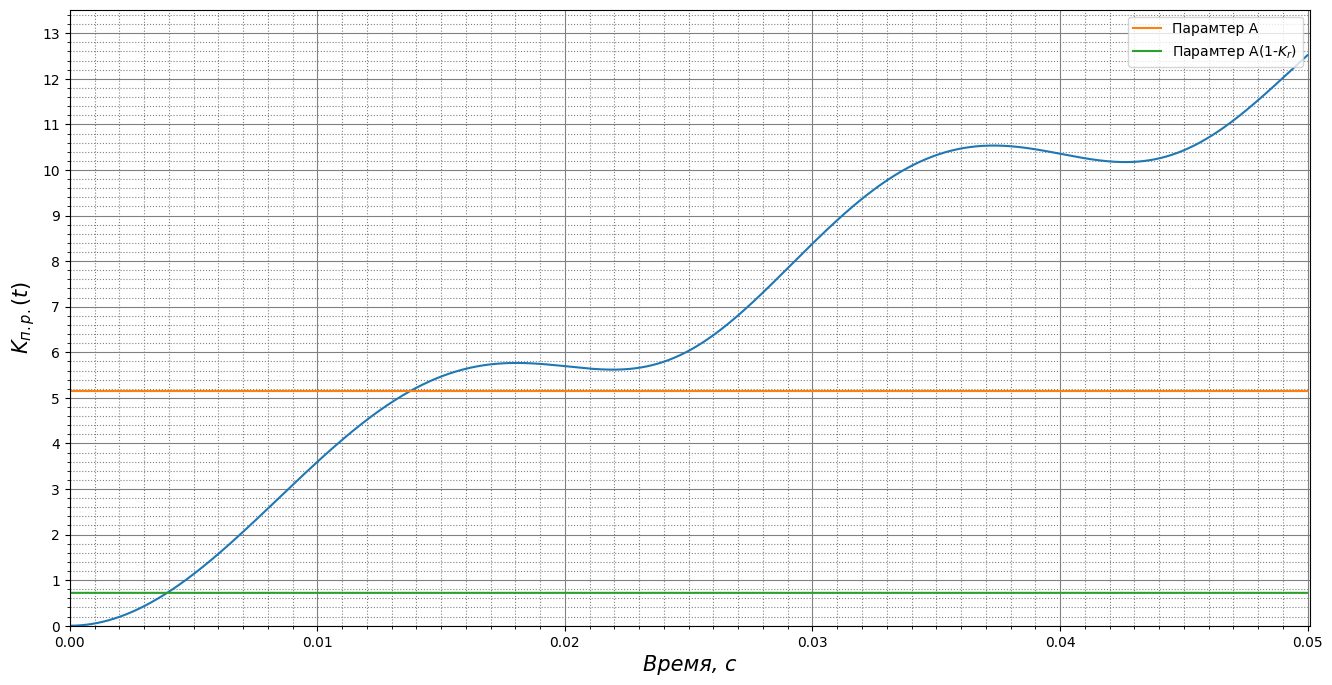

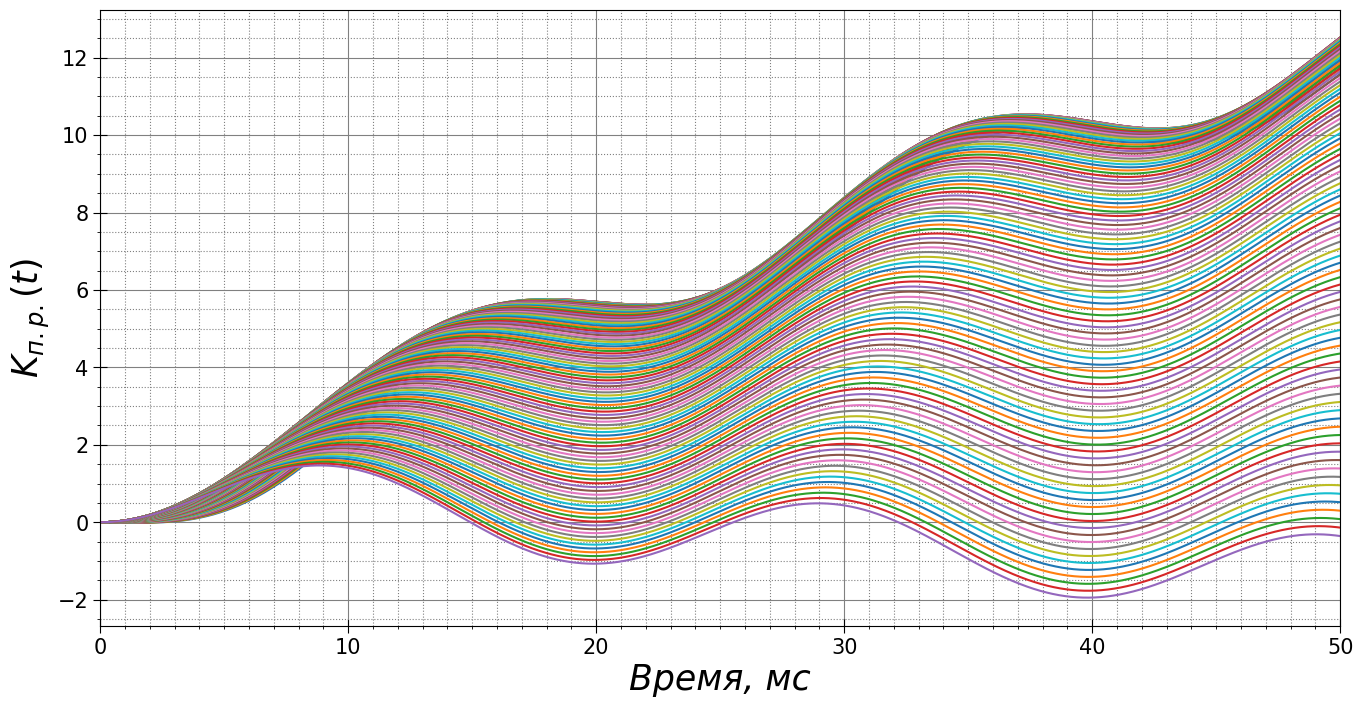

In [ ]:
A_ost=A_bez*(1-Kr)
fi=np.arctan(w*Tp)
a=np.arccos(cosa)
o=[(i*np.pi/180)-fi for i in range(75,190,1)] # меняю градусы
Kpr=np.array([np.sin(a)*np.cos(i)*np.exp(-t/Tp)+np.cos(a)*np.cos(i)*w*Tp*(1-np.exp(-t/Tp)) - np.sin(w*t+a+i) + np.cos(a)*np.sin(i) for i in o])

# расчёт времени до насыщения
Kpr_uni,t_bez,t_ost=vremya_do_nasish(t,Kpr,A_bez,A_ost)

# напечатать ответ
otvet(t_bez, t_ost)

#построить график
graphic(t,Kpr_uni,t_bez,t_ost, A_bez, A_ost)

# сделать красиво
mnogo_Kpr(t,Kpr)

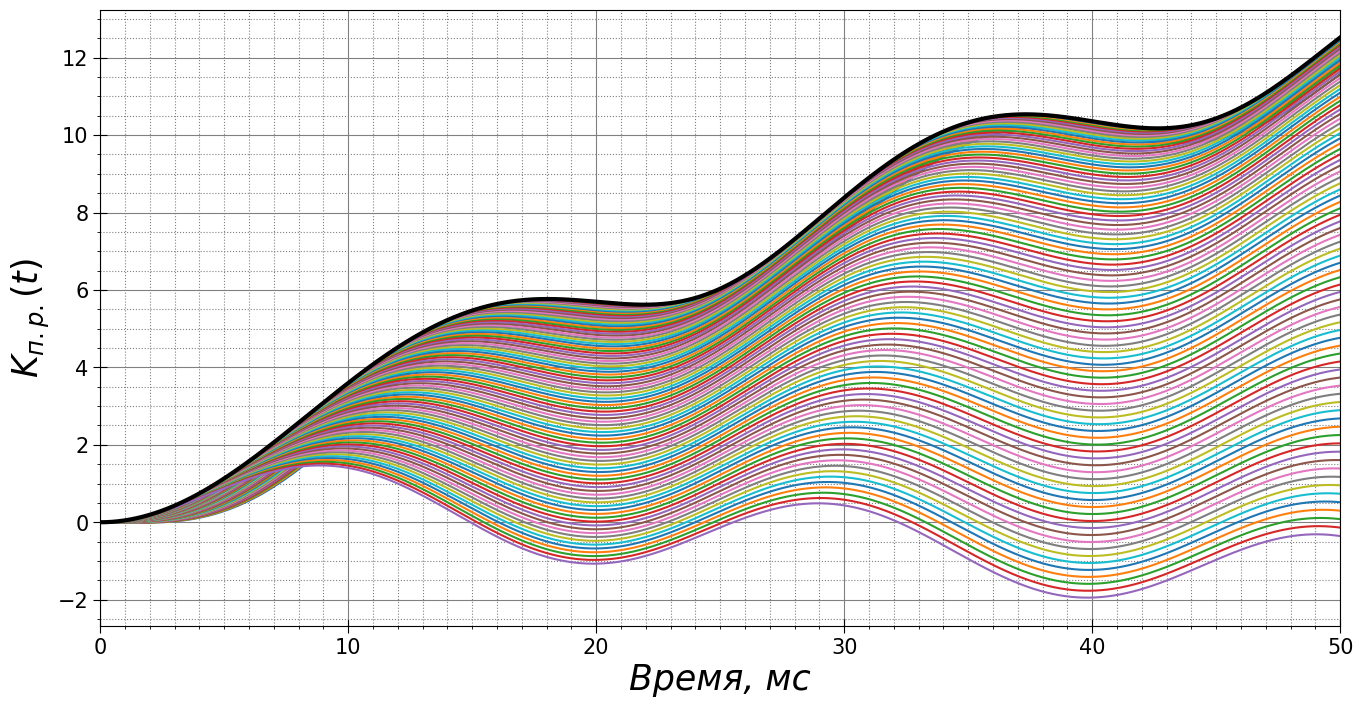

In [ ]:
  fig, ax = plt.subplots(figsize=(16,8))
  for i in range(len(Kpr)):
    ax.plot(t*1000,Kpr[i])
  ax.plot(t*1000,Kpr_uni, linewidth=3,color='black')
  plt.xlabel('Время, мс', fontsize=25, fontstyle='italic' )
  plt.ylabel(r'$K_{п.р.}(t)$', fontsize=25, fontstyle='italic')
  ax.minorticks_on()
  plt.grid(which='major',color = 'gray')
  ax.grid(which='minor',color = 'gray',linestyle = ':')
  ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
  ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
  ax.set_xlim([0,t[-1]*1000+0.01])
  ax.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
                which = 'major',    #  Применяем параметры к основным делениям
                direction = 'inout', #  Рисуем деления внутри и снаружи графика
                labelsize = 15,    #  Размер подписи
               length = 10)    #  Длинна делений
               #width = 5)     #  Ширина делений
  plt.savefig('для статьи.png')
  plt.show()